### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from datetime import datetime

### Read city file

In [2]:
Haifa = pd.read_csv('./cities/Haifa.csv')

### Check rows, columns and data types

In [3]:
Haifa.head()

,Unnamed: 0,datetime,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_weather_description,Haifa_wind_direction,Haifa_wind_speed
0,0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012-10-01 13:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
2,2,2012-10-01 14:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
3,3,2012-10-01 15:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
4,4,2012-10-01 16:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0


In [4]:
Haifa.dtypes

Unnamed: 0                     int64
datetime                      object
Haifa_humidity               float64
Haifa_pressure               float64
Haifa_temperature            float64
Haifa_weather_description     object
Haifa_wind_direction         float64
Haifa_wind_speed             float64
dtype: object

### Data Cleaning
#### 1. Remove unwanted columns and formating of columns

In [5]:
Haifa.drop('Unnamed: 0', axis=1, inplace=True) #Remove 'Unnamed: 0' column
Haifa['datetime']=pd.to_datetime(Haifa['datetime']) #change format of 'datetime' from string to date
Haifa.head()

,datetime,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_weather_description,Haifa_wind_direction,Haifa_wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
2,2012-10-01 14:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
3,2012-10-01 15:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
4,2012-10-01 16:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0


#### 2. Remove NaN values

In [6]:
Haifa.isna().sum() #Checking for total NaN values for each column

datetime                       0
Haifa_humidity               818
Haifa_pressure               798
Haifa_temperature            798
Haifa_weather_description    793
Haifa_wind_direction         793
Haifa_wind_speed             795
dtype: int64

In [7]:
Haifa_nan = Haifa[Haifa.isna().any(axis=1)<=1]
Haifa_nan.tail(795) #checking for multiple NaN values per row

,datetime,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_weather_description,Haifa_wind_direction,Haifa_wind_speed
44458,2017-10-27 22:00:00,95.0,1023.0,299.553,sky is clear,38.0,3.0
44459,2017-10-27 23:00:00,96.0,1023.0,299.369,sky is clear,69.0,1.0
44460,2017-10-28 00:00:00,96.0,1023.0,299.369,sky is clear,69.0,1.0
44461,2017-10-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44462,2017-10-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Haifa = Haifa[Haifa.isnull().sum(axis=1) <= 1] #Removing rows with multiple NaN values

In [9]:
Haifa.shape

(44455, 7)

In [10]:
Haifa[Haifa.isna().any(axis=1)] #Checking for rows with single NaN values

,datetime,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_weather_description,Haifa_wind_direction,Haifa_wind_speed
31516,2016-05-06 16:00:00,NaN,1011.0,300.370,light rain,272.0,4.0
31517,2016-05-06 17:00:00,NaN,1011.0,298.710,light rain,272.0,4.0
31518,2016-05-06 18:00:00,NaN,1012.0,298.150,light rain,272.0,4.0
31519,2016-05-06 19:00:00,NaN,1012.0,298.150,light rain,272.0,4.0
31520,2016-05-06 20:00:00,NaN,1012.0,297.590,overcast clouds,275.0,5.0
31521,2016-05-06 21:00:00,NaN,1012.0,297.590,overcast clouds,275.0,5.0
31522,2016-05-06 22:00:00,NaN,1011.0,297.590,overcast clouds,275.0,5.0
31781,2016-05-17 17:00:00,NaN,1010.0,315.930,sky is clear,0.0,0.0
31782,2016-05-17 18:00:00,NaN,1011.0,315.930,sky is clear,0.0,0.0
31783,2016-05-17 19:00:00,NaN,1011.0,315.930,sky is clear,0.0,0.0


In [11]:
Haifa[Haifa.isna().any(axis=1)].isna().sum() #Checking number of NaN values per column

datetime                      0
Haifa_humidity               20
Haifa_pressure                0
Haifa_temperature             0
Haifa_weather_description     0
Haifa_wind_direction          0
Haifa_wind_speed              2
dtype: int64

### Check for Outliers

<AxesSubplot:xlabel='Haifa_pressure'>

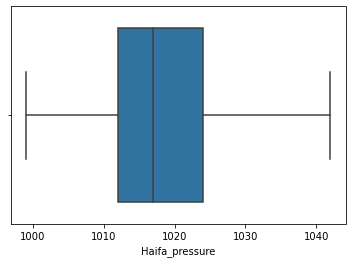

In [12]:
sns.boxplot(x=Haifa['Haifa_pressure'])

<AxesSubplot:xlabel='Haifa_temperature'>

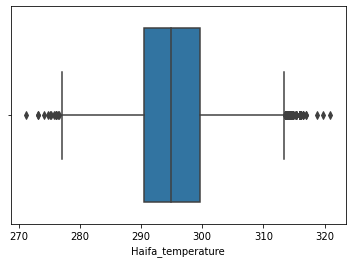

In [13]:
sns.boxplot(x=Haifa['Haifa_temperature'])

<AxesSubplot:xlabel='Haifa_humidity'>

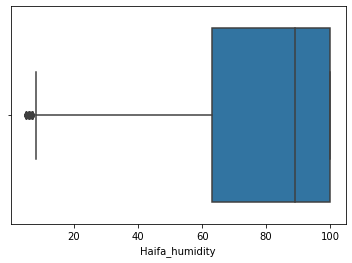

In [14]:
sns.boxplot(x=Haifa['Haifa_humidity'])

<AxesSubplot:xlabel='Haifa_wind_direction'>

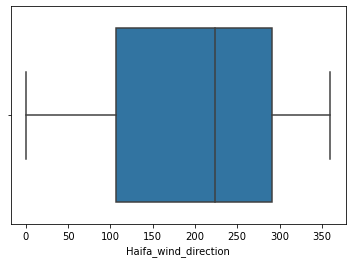

In [15]:
sns.boxplot(x=Haifa['Haifa_wind_direction'])

<AxesSubplot:xlabel='Haifa_wind_speed'>

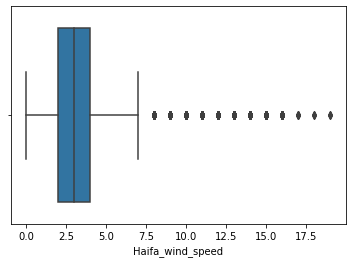

In [16]:
sns.boxplot(x=Haifa['Haifa_wind_speed'])

In [17]:
Haifa.describe()

,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_wind_direction,Haifa_wind_speed
count,44435.000000,44455.000000,44455.000000,44455.000000,44453.000000
mean,79.800383,1017.550804,295.266398,196.092611,3.299777
std,23.051692,7.500017,6.324566,112.485353,2.177344
min,5.000000,999.000000,271.150000,0.000000,0.000000
25%,63.000000,1012.000000,290.467333,107.000000,2.000000
50%,89.000000,1017.000000,294.820000,224.000000,3.000000
75%,100.000000,1024.000000,299.660000,291.000000,4.000000
max,100.000000,1042.000000,320.930000,360.000000,19.000000


In [18]:
Haifa.dropna(inplace=True) #Remove rows with NaN values

In [19]:
Haifa[Haifa.isna().any(axis=1)] #Confirm removal of NaN values

,datetime,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_weather_description,Haifa_wind_direction,Haifa_wind_speed


### Check for insights

<AxesSubplot:>

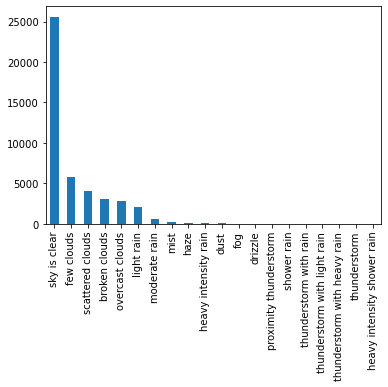

In [20]:
Haifa['Haifa_weather_description'].value_counts().plot(kind='bar') #Check distribution of target variable

In [21]:
Haifa.describe()

,Haifa_humidity,Haifa_pressure,Haifa_temperature,Haifa_wind_direction,Haifa_wind_speed
count,44433.000000,44433.000000,44433.000000,44433.000000,44433.000000
mean,79.801319,1017.553710,295.260760,196.133144,3.300565
std,23.051773,7.500525,6.317437,112.456526,2.177047
min,5.000000,999.000000,271.150000,0.000000,0.000000
25%,63.000000,1012.000000,290.464000,107.000000,2.000000
50%,89.000000,1017.000000,294.820000,224.000000,3.000000
75%,100.000000,1024.000000,299.655000,291.000000,4.000000
max,100.000000,1042.000000,320.930000,360.000000,19.000000


<AxesSubplot:>

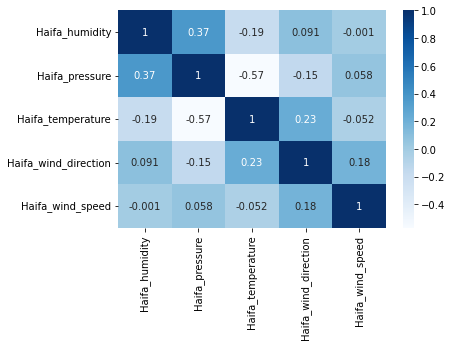

In [22]:
sns.heatmap(Haifa.corr(),cbar=True,annot=True,cmap='Blues') #checking for correlation